In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

2022-10-23 13:19:41.390155: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-23 13:19:41.579697: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-23 13:19:41.619901: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-23 13:19:41.619915: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
train_path = "Datasets/DogsandCats/training_set/training_set/"
train_images = keras.utils.image_dataset_from_directory(train_path, label_mode='binary', image_size=[128, 128],
                                                 interpolation='nearest', batch_size=32)

Found 8000 files belonging to 2 classes.


2022-10-23 13:19:45.775711: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 13:19:45.775866: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-23 13:19:45.775902: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-10-23 13:19:45.775925: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-10-23 13:19:45.775947: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [3]:
validation_path = "Datasets/DogsandCats/test_set/test_set/"
validation_images = keras.utils.image_dataset_from_directory(validation_path, label_mode='binary', image_size=[128, 128],
                                                 interpolation='nearest', batch_size=32)

Found 2000 files belonging to 2 classes.


In [4]:
type(train_images)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [7]:
model = keras.Sequential([
            layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(128, 128, 3)),
            layers.Dropout(0.2),
            layers.MaxPool2D(),
            
            layers.Conv2D(64, kernel_size=3, activation='relu'),
            layers.Dropout(0.2),
            layers.MaxPool2D(),
    
            layers.Conv2D(128, kernel_size=3, activation='relu'),
            layers.Dropout(0.2),
            layers.MaxPool2D(),
            
            layers.Conv2D(256, kernel_size=3, activation='relu'),
            layers.Dropout(0.2),
            layers.MaxPool2D(),
    
            layers.Conv2D(512, kernel_size=3, activation='relu'),
            layers.Dropout(0.2),
            layers.MaxPool2D(),
    
            layers.Flatten(),
    
            layers.Dense(512, activation='relu'),
            layers.Dense(100, activation='relu'),
            layers.Dense(1, activation='sigmoid')
])

In [8]:
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 dropout_5 (Dropout)         (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 dropout_6 (Dropout)         (None, 61, 61, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [9]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.00001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_images, validation_data=validation_images, batch_size=32, validation_batch_size=32,
                    epochs=50, callbacks=[reduce_lr])

Epoch 1/50
250/250 [==============================] - 52s 204ms/step - loss: 1.9276 - accuracy: 0.5556 - val_loss: 0.6985 - val_accuracy: 0.5005 - lr: 0.0010
Epoch 2/50
250/250 [==============================] - 51s 203ms/step - loss: 0.6833 - accuracy: 0.5884 - val_loss: 0.7252 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/50
250/250 [==============================] - 50s 202ms/step - loss: 0.6902 - accuracy: 0.5459 - val_loss: 0.6579 - val_accuracy: 0.6155 - lr: 0.0010
Epoch 4/50
250/250 [==============================] - 52s 207ms/step - loss: 0.6747 - accuracy: 0.5729 - val_loss: 0.6727 - val_accuracy: 0.6230 - lr: 0.0010
Epoch 5/50
250/250 [==============================] - 54s 217ms/step - loss: 0.6672 - accuracy: 0.5993 - val_loss: 0.6621 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 6/50
250/250 [==============================] - 55s 218ms/step - loss: 0.6461 - accuracy: 0.6266 - val_loss: 0.6441 - val_accuracy: 0.6515 - lr: 0.0010
Epoch 7/50
250/250 [==============================] 

In [11]:
testing = model.evaluate(validation_images, batch_size=40)

63/63 [==============================] - 3s 43ms/step - loss: 0.4496 - accuracy: 0.8425


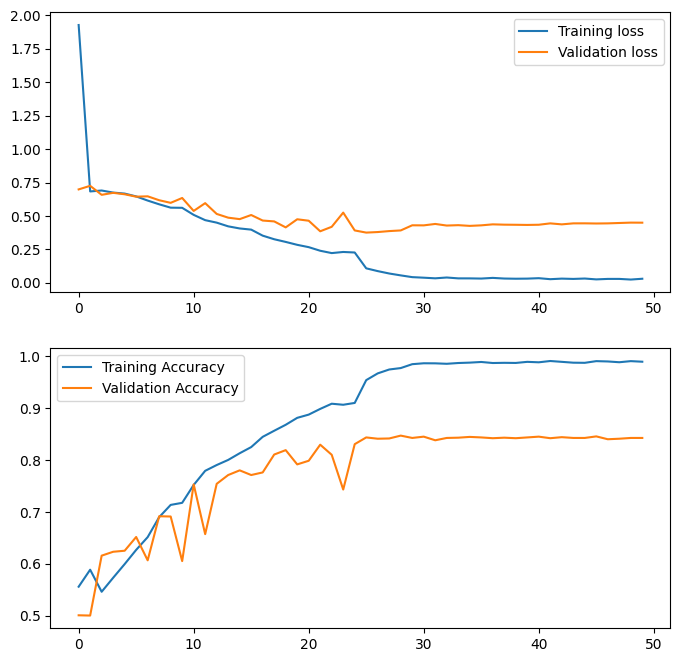

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.plot(history.history["loss"])
ax1.plot(history.history["val_loss"])
ax1.legend(["Training loss", "Validation loss"])
ax2.plot(history.history["accuracy"])
ax2.plot(history.history["val_accuracy"])
ax2.legend(["Training Accuracy", "Validation Accuracy"])

In [44]:
def model_predict(img_loc):
    img = keras.preprocessing.image.load_img(img_loc)
    img = img.resize([128, 128])
    plt.imshow(img)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    prediction = model.predict(img_array)
    if (prediction[0][0] > 0.5):
        print("Image is a dog")
    else:
        print("Image is a cat")

1/1 [==============================] - 0s 18ms/step
Image is a dog
1/1 [==============================] - 0s 15ms/step
Image is a dog
1/1 [==============================] - 0s 18ms/step
Image is a dog
1/1 [==============================] - 0s 14ms/step
Image is a dog
1/1 [==============================] - 0s 14ms/step
Image is a cat
1/1 [==============================] - 0s 14ms/step
Image is a cat
1/1 [==============================] - 0s 16ms/step
Image is a cat
1/1 [==============================] - 0s 14ms/step
Image is a cat


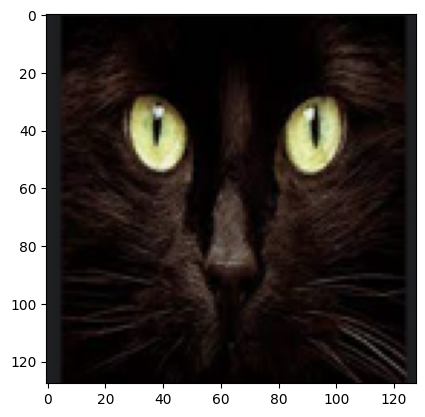

In [42]:
locations = ["/home/ssk/Downloads/Screenshot 2022-10-23 at 14-24-00 dogs - Google Search.png", 
            "/home/ssk/Downloads/Screenshot 2022-10-23 at 14-24-08 dogs - Google Search.png",
            "/home/ssk/Downloads/Screenshot 2022-10-23 at 14-25-14 dogs - Google Search.png",
            "/home/ssk/Downloads/Screenshot 2022-10-23 at 14-25-23 dogs - Google Search.png",
            "/home/ssk/Downloads/Screenshot 2022-10-23 at 14-26-09 cats - Google Search.png",
            "/home/ssk/Downloads/Screenshot 2022-10-23 at 14-25-58 cats - Google Search.png",
            "/home/ssk/Downloads/Screenshot 2022-10-23 at 14-26-02 cats - Google Search.png",
            "/home/ssk/Downloads/Screenshot 2022-10-23 at 14-26-17 cats - Google Search.png"]
for i in locations:
    model_predict(i)

In [30]:
model1 = model.save("DogsandCatsModel")

INFO:tensorflow:Assets written to: DogsandCatsModel/assets


INFO:tensorflow:Assets written to: DogsandCatsModel/assets
